# Emprical Investigation into GOSDT Runtime and Performance with the GOSDT Python Library

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import gosdt

## Load Breast Cancer Dataset

In [3]:

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Optional: shuffle and split
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Dataset Size

possible timeout: gosdt reported possible timeout.
training completed. -1.000/-1.000/-1.000 (user, system, wall), mem=0 MB
bounds: [0.150000..0.183516] (0.033516) loss=0.083516, iterations=9999
Size 500: 66.23s, Acc=0.930, Leaves=2
65.18 60 queue emtpy: 0
possible timeout: gosdt reported possible timeout.65.999 60 queue emtpy: 0

training completed. -1.000/-1.000/-1.000 (user, system, wall), mem=0 MB
bounds: [0.150000..0.183516] (0.033516) loss=0.083516, iterations=9999
Size 1000: 66.91s, Acc=0.930, Leaves=2
possible timeout: gosdt reported possible timeout.65.663 60 queue emtpy: 0

training completed. -1.000/-1.000/-1.000 (user, system, wall), mem=0 MB
bounds: [0.150000..0.183516] (0.033516) loss=0.083516, iterations=9999
Size 2000: 66.55s, Acc=0.930, Leaves=2
possible timeout: gosdt reported possible timeout.
training completed. -1.000/-1.000/-1.000 (user, system, wall), mem=0 MB
bounds: [0.150000..0.183516] (0.033516) loss=0.083516, iterations=9999
Size 4000: 66.63s, Acc=0.930, Leav

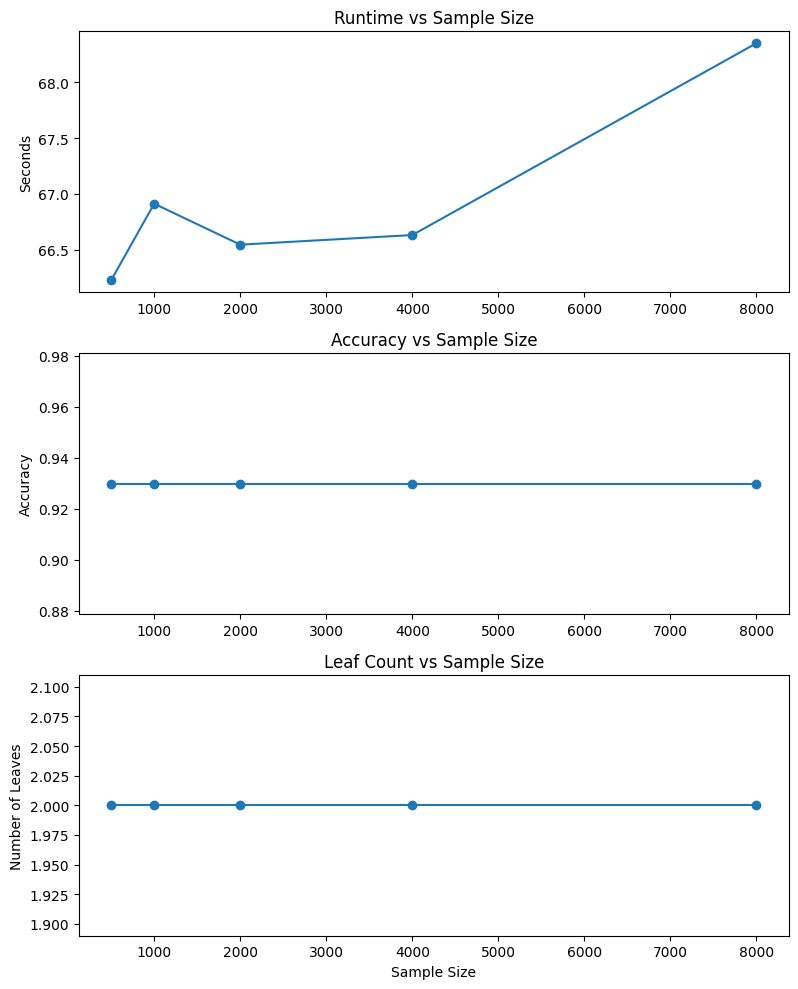

: 

In [ ]:
sample_sizes = [100, 500, 1000, 2000, 4000, 8000]
runtimes, accuracies, leaves = [], [], []

for size in sample_sizes:
    X_sub, y_sub = X_train.iloc[:size], y_train.iloc[:size]

    config = {
        "regularization": 0.05,
        "depth_budget": 10,
        "time_limit": 60
    }

    model = gosdt.GOSDT(config)

    start = time.time()
    model.fit(X_sub, y_sub)
    end = time.time()

    preds       = model.predict(X_test)
    acc         = accuracy_score(y_test, preds)
    leaf_count  = model.tree.leaves()
    elapsed     = end - start     

    runtimes.append(elapsed)
    accuracies.append(acc)
    leaves.append(leaf_count)

    print(f"Size {size}: {elapsed:.2f}s, Acc={acc:.3f}, Leaves={leaf_count}")

# Plot runtime, accuracy, and leaves
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].plot(sample_sizes, runtimes, marker='o')
axs[0].set_title("Runtime vs Sample Size")
axs[0].set_ylabel("Seconds")

axs[1].plot(sample_sizes, accuracies, marker='o')
axs[1].set_title("Accuracy vs Sample Size")
axs[1].set_ylabel("Accuracy")

axs[2].plot(sample_sizes, leaves, marker='o')
axs[2].set_title("Leaf Count vs Sample Size")
axs[2].set_ylabel("Number of Leaves")
axs[2].set_xlabel("Sample Size")

plt.tight_layout()
plt.show()


## Regularization

In [4]:
regularization_vals = [0.02, 0.05, 0.1, 0.2, 0.5]
runtimes, accuracies, leaves = [], [], []

X_sub, y_sub = X_train.iloc[:4000], y_train.iloc[:4000]

for reg in regularization_vals:
    config = {
        "regularization": reg,
        "depth_budget": 4,
        "time_limit": 60
    }

    model = gosdt.GOSDT(config)
    start = time.time()
    model.fit(X_sub, y_sub)
    end = time.time()

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    leaf_count = model.tree.leaves()

    runtimes.append(end - start)
    accuracies.append(acc)
    leaves.append(leaf_count)

    print(f"λ={reg:.2f}: {end - start:.2f}s, Acc={acc:.3f}, Leaves={leaf_count}")

# Plot
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].plot(regularization_vals, runtimes, marker='o')
axs[0].set_title("Runtime vs Regularization")
axs[0].set_ylabel("Seconds")

axs[1].plot(regularization_vals, accuracies, marker='o')
axs[1].set_title("Accuracy vs Regularization")
axs[1].set_ylabel("Accuracy")

axs[2].plot(regularization_vals, leaves, marker='o')
axs[2].set_title("Leaf Count vs Regularization")
axs[2].set_ylabel("Number of Leaves")
axs[2].set_xlabel("λ (Regularization)")

plt.tight_layout()
plt.show()


: 

## Max Depth

In [ ]:
depth_vals = [2, 3, 4, 5, 6]
runtimes, accuracies, leaves = [], [], []

for depth in depth_vals:
    config = {
        "regularization": 0.1,
        "depth_budget": depth,
        "time_limit": 60
    }

    model = gosdt.GOSDT(config)
    start = time.time()
    model.fit(X_sub, y_sub)
    end = time.time()

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    leaf_count = model.tree.leaves()

    runtimes.append(end - start)
    accuracies.append(acc)
    leaves.append(leaf_count)

    print(f"Depth {depth}: {end - start:.2f}s, Acc={acc:.3f}, Leaves={leaf_count}")

# Plot
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].plot(depth_vals, runtimes, marker='o')
axs[0].set_title("Runtime vs Max Depth")
axs[0].set_ylabel("Seconds")

axs[1].plot(depth_vals, accuracies, marker='o')
axs[1].set_title("Accuracy vs Max Depth")
axs[1].set_ylabel("Accuracy")

axs[2].plot(depth_vals, leaves, marker='o')
axs[2].set_title("Leaf Count vs Max Depth")
axs[2].set_ylabel("Number of Leaves")
axs[2].set_xlabel("Max Depth")

plt.tight_layout()
plt.show()
